<a href="https://colab.research.google.com/github/owenlee20/msdia-portfolio/blob/main/GB881_FinalProjectBusinessCaseAnalysis_Lee_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GB881, Final Project Part 2, Business Case Analysis: Scooter Rentals – Owen Lee

##### First, libraries will be loaded in/imported for use throughout the code.
##### **Pandas** is a useful library for data analysis and manipulation.
##### **Seaborn** will be used later on to assist with generating powerful visualizations and graphs.
##### **sklearn** (a.k.a. Scikit-learn) will also be used later on and is a great library with functions helpful for modeling and regression for the assignment's purposes.

In [ ]:
# Loading the appropriate libraries…
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Loading the data into a dataframe.
# 'sr' refers to Scooter Rentals.
df_sr = pd.read_csv('https://bit.ly/scooter-rentals')

### Question 1: Determining dimensions of the dataset
##### The dimensions of a dataset (display of all rows and columns) are a great measure to help get a better idea of the size of the dataset. The result displayed after running the code is printed in this format: (rows, columns).
#####In this context, the columns are multiple different variables like date, season, registered/unregistered rentals, weather factors, and more. The rows detail all entries into these columns for a specific day, or record.
##### From the result, there appear to be **731** records (rows).

In [ ]:
# The shape function can be used to view the dimensions of the dataframe.
df_sr.shape

(731, 14)

### Question 2: Listing datatypes for each column in the dataset, specifically registered rentals
##### Listing datatypes is helpful to understand what columns contain values that are numeric, values that contain text/strings, and more. It can also identify potential issues that may arise if there are columns that need to have their datatype changed for a more readable dataset and useful analysis.
##### From the result, the datatype for the "registered" column is **int64**.

In [ ]:
# The info function can be used to view the datatypes for each column in the dataframe.
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


### Changing field names/Adjusting the data
##### The field names (column names) can be changed to make them more readable and useful for the end user.
##### In this context, changing column names from their abbreviated terms to more easily understandable names ensures there is no confusion in analysis. A similar line of code can be copied multiple times to change column names, with the only difference between the lines being the respective column names that are being adjusted.

In [ ]:
# The rename function can be used to rename columns to make the titles more useful.
# Each column name is changed from the name before the colon to the name after the colon.
df_sr = df_sr.rename(columns = {'yr' : 'year'})
df_sr = df_sr.rename(columns = {'mnth' : 'month'})
df_sr = df_sr.rename(columns = {'hum' : 'humidity_norm'})
df_sr = df_sr.rename(columns = {'temp' : 'temp_norm'})
df_sr = df_sr.rename(columns = {'atemp' : 'temp_felt_norm'})
df_sr = df_sr.rename(columns = {'wind' : 'wind_norm'})
df_sr = df_sr.rename(columns = {'registered' : 'rentals_registered'})
df_sr = df_sr.rename(columns = {'unregistered' : 'rentals_unregistered'})

# To confirm column name changes were made, the head function can be used to generate a preview of the first few records, including the new column names.
df_sr.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


### Question 3: Determining the value in the last row of the data preview in the unregistered rentals column
##### Previewing the dataset is another great way to get an idea of what the code looks like, in a similar fashion to finding the dimensions. Understanding how the columns are ordered or how values are displayed in the first few rows better suits the user for analysis later on.
##### For the last row in the output, the value for unregistered scooter rentals is **82**.

In [ ]:
# As mentioned previously, the head function can be used to preview the first few records in the dataset.
# The first five records are generated by default.
df_sr.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


### Replacing data: Replacing numbers 1, 2, 3, and 4 with correlating season names
##### Changes to be made: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall
##### This adjustment of replacing numbers used to represent seasons with their literal names as strings converts the datatype of the column 'season' from int64 to object. In this context, this is a helpful way to make the dataset more understandable and universal for readers, but it is a good idea to take note of this as any future numeric visual or calculation including a column like this will likely result in error, as object datatypes (text/strings) are inherently not compatible with numerical functions.

In [ ]:
# The replace function can be used to replace certain values with new, more useful ones that mean the same thing.
df_sr['season'] = df_sr['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])

# The head function can be used to confirm changes were made in the season column specifically.
# df_sr.head()

# The info function could be used again to confirm the change in datatype of the season column to object.
# df_sr.info()

### Question 4: Creating a new column called “rentals_total” that sums all registered and unregistered scooter rentals
##### This process involves utilizing two existing columns' values for a new column, the total rentals. The sum of the two specified columns will go into the new column for each row. It is important to initialize the new column's count to zero before summing to ensure there are no mathematical or logic errors.
##### The scooter rentals on 1/5/2011 totaled to **1600** rentals.

In [ ]:
# Denoting the two columns to be summed together…
rental_columns = ['rentals_registered', 'rentals_unregistered']

# Creating a new column for total rentals and setting total to 0 to begin (using integers, int64).
df_sr['rentals_total'] = 0

# Summing the two rental value columns and assigning the sum to the new column for each row (axis 1 means summing horizontally).
df_sr['rentals_total'] = df_sr[rental_columns].sum(axis = 1)

# The head function can be used to confirm the column was added and it functions properly.
# The total rentals on the specified date can conveniently be displayed in a preview of the first few records.
df_sr.head(10)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,1/6/2011,0,1,4,1,winter,0,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,1/7/2011,0,1,5,1,winter,0,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,1/8/2011,0,1,6,0,winter,0,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,1/9/2011,0,1,0,0,winter,0,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,1/10/2011,0,1,1,1,winter,0,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Question 5: Determining the standard deviation for total rentals by generating descriptive statistics
##### The descriptive statistics table generated using pandas' describe function is a powerful tool to gain insights about each column in the data.
##### It may assist in noticing what values might be especially large or small or other interesting points in the data such as the average normalized windspeed. It should be noted that non-numerical columns (in this context: like date and season) are not included in descriptive statistics, as mentioned earlier: values that are objects/strings are not compatible with numerical functions and inherently are not included in the descriptive statistics table.
##### The standard deviation for total rentals appears to be **1937.21** (rounded to two decimal places).

In [ ]:
# The describe function can be used to generate descriptive statistics and find the standard deviation in a column.
df_sr.describe()

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Missing values: Determining if there are any missing values in the dataset and dropping those rows
##### Dropping rows that are missing (null) is a effective way to clean the dataset for further analysis. Remaining null values may affect the output of future calculations, visuals, or analysis, so it is best practice to drop them while cleaning the data before proceeding.

In [ ]:
# The drop function can be used to drop rows with missing values (null values).
df_sr = df_sr.dropna()

### Generating visualizations
##### A **histogram** effectively charts the distribution of data for a specified column; in this context, the distribution of total rentals of scooters is shown.
##### Total rentals tend to center around 4500-5000 rentals; in other words, the frequency of around 4800 total scooter rentals is the most common throughout the dataset.

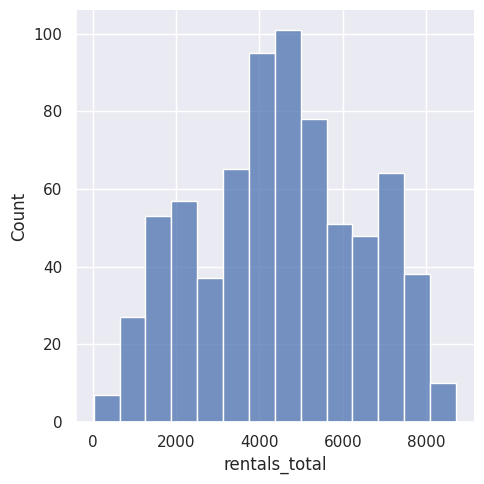

In [ ]:
# The code below generates a visual distribution of the specified data.
# First, style preferences are applied to help better visualize the data with the code below.
sns.set(style = 'darkgrid')

sns.displot(df_sr, x = 'rentals_total')

##### A **scatterplot** displays the relationship between two numerical variables and can reveal patterns or clusters upon observation of how the data points are distributed across the axes. In this case, unregistered scooter rentals are on the x-axis and registered scooter rentals are on the y-axis.
##### In this visual, datapoints are colored based on whether or not it was a workday at the time to help readers understand scooter rentals on weekdays vs. weekends.
##### Upon observation, it appears that there are more scooter rentals made by customers with *unregistered* accounts on weekends, and it appears that there are more scooter rentals made by customers with *registered* accounts on weekdays.
##### When workday is 0, it is a weekend

<Axes: xlabel='rentals_unregistered', ylabel='rentals_registered'>

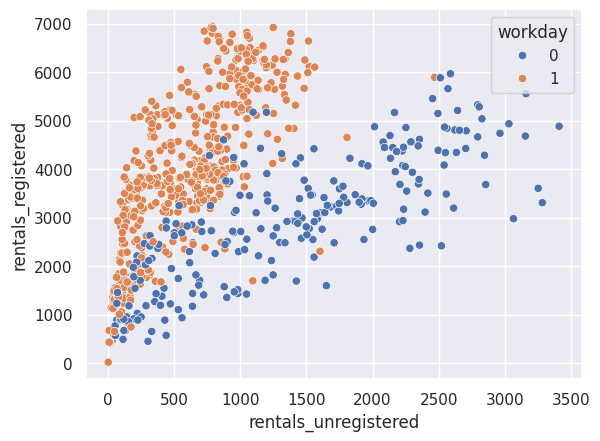

In [ ]:
# The code below generates a scatterplot for the analysis described above.
sns.scatterplot(df_sr, x = 'rentals_unregistered', y = 'rentals_registered', hue = 'workday')

##### A **swarmplot** usefully displays distribution of categorical data, including all the data points. This can help identify potential outliers and general trends within each category; in this case, the categories are the seasons.
##### The seasons are on the x-axis and total scooter rentals are on the y-axis.
##### Upon analysis of the visual, there are clearly fewer total scooter rentals in the winter. The total scooter rentals is about the same for fall and spring, which is what one would expect in seasons of moderate temperature. Finally, the swarmplot shows high amounts of total rentals in the summer, which is often a great time to rent a scooter.

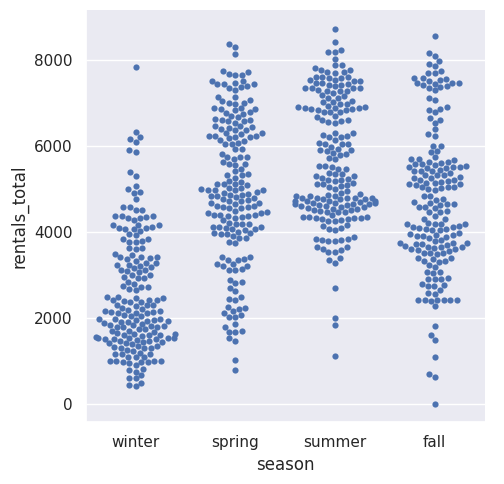

In [ ]:
# The code below generates a swarmplot for the specified analysis.
sns.catplot(df_sr, x = 'season', y = 'rentals_total', kind = 'swarm', s = 20)

##### A **line plot** can clearly display trends using a series of data points over a period of time for a given variable.
##### In this case, the line plot shows average daily rentals by month, with lines separated by year. Months are displayed on the x-axis and total scooter rentals are displayed on the y-axis.
##### From looking at the visual, the was a clear increase in total scooter rentals from the first year to the second year (0 = 2011, and 1 = 2012). In the swarmplot analysis, more total scooter rentals were made in the summer, and this line plot reinforces that conclusion upon observing where the lines tend to spike across the months. Similarly, the lines appear to dip lower in the winter months, which was also a conclusion that could be drawn from the swarmplot.
##### However, it should be noted that it is difficult to identify exact outlier points in a line plot as it does not display each individual point like a swarmplot.


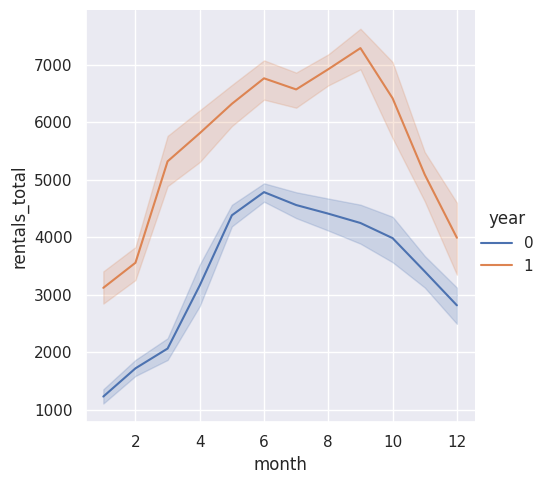

In [ ]:
# The code below generates a line plot for the specified analysis.
sns.relplot(df_sr, kind = 'line', x = 'month', y = 'rentals_total', hue = 'year')

##### A **pairplot** effectively displays relationships between multiple variables in a graphical format. Pairplots are essentially a grid of scatterplots that show each variable relates to all other variables in the dataset.
##### For this case, the pairplot shows the relationship between total scooter rentals and weather indicators, such as normalized temperature, humidity, and wind.
##### It should be noted that these weather indicator variables are *continuous variables*, meaning that they can take on an infinite number of values (they can be fractions or decimals, they are not finite).
##### There are many insights to be gained from this visual: First, as normalized temperature increases (and 'feeling' temperature), the total scooter rentals also increased, indicating a moderate to strong *positive* relationship between the variables. Additionally, as normalized windspeed decreases, total scooter rentals appears to increase, indicating a weak *negative* relationship (this relationship does not appear to be as strong as the first relationship mentioned).
##### Lastly, there is a highly strong *positive* relationship between normalized temperature and normalized felt temperature; this makes sense because the temperature that individuals feel is very often quite similar to the actual temperature, resulting in a strong relationship between the variables.

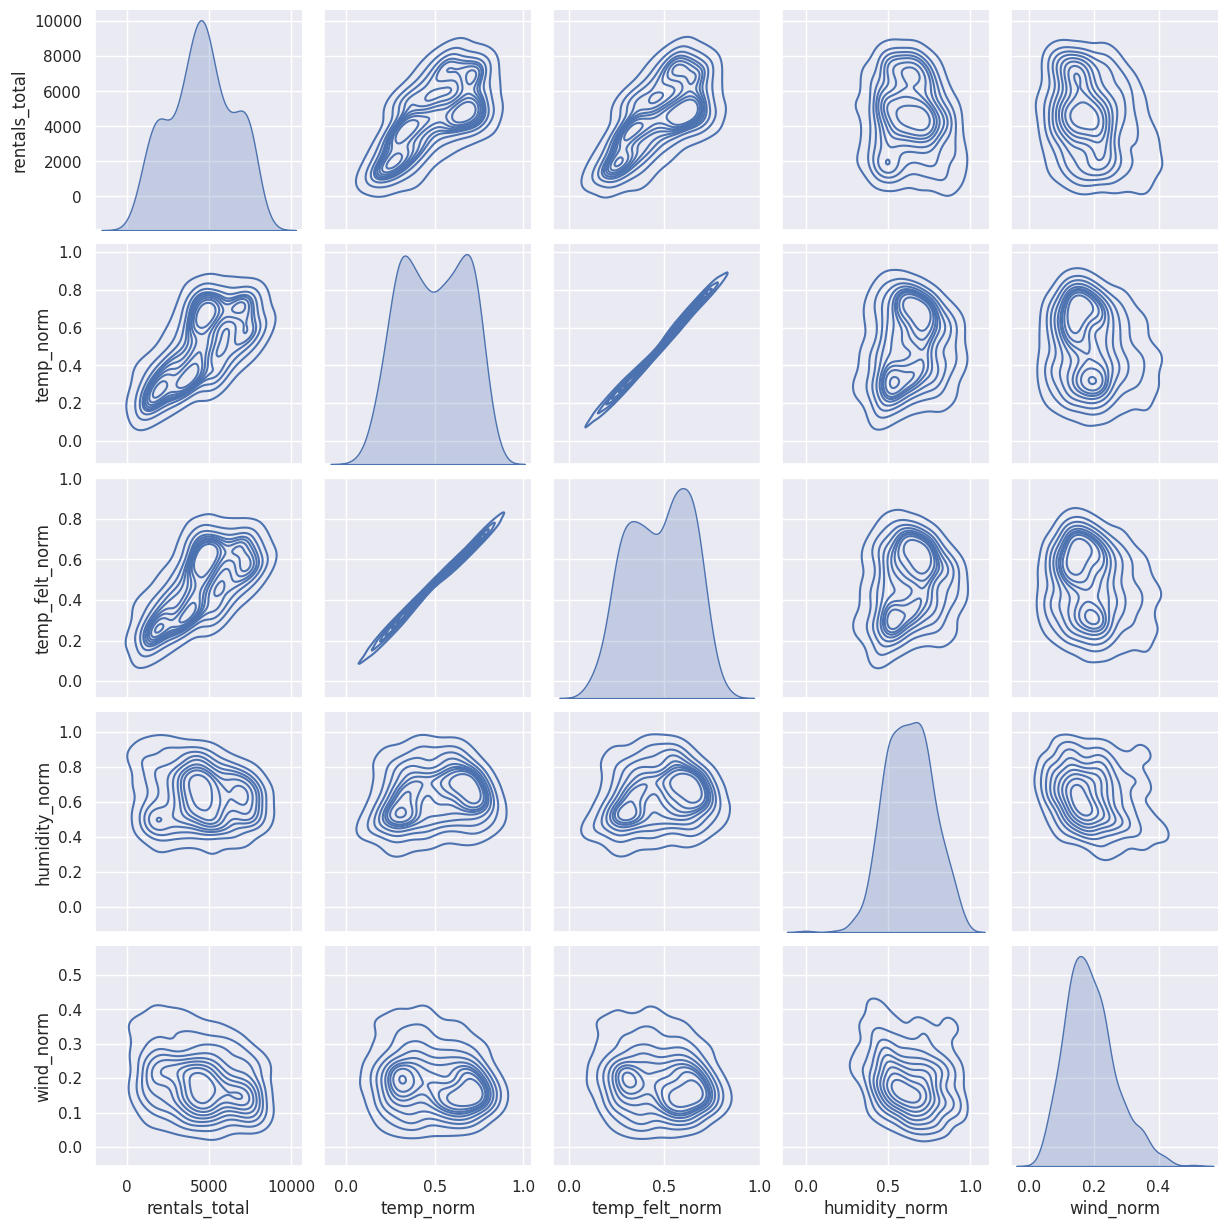

In [ ]:
# First, a separate dataframe needs to be created that includes only the specified columns.
df_sr_for_visuals = df_sr[['rentals_total', 'temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm']]

# The code below generates a pairplot for the specified analysis.
sns.pairplot(df_sr_for_visuals, kind = 'kde')

##### A **heatmap** helps to better visualize correlation between total scooter rentals and weather indicators using a color gradient to measure relationship strength.
##### As confirmed by the pairplot previously generated, there is a moderate to strong *positive* relationship between total scooter rentals and temperature variables. This is shown by the correlation coefficient of 0.63 and the orange coloring.
##### Additionally, there is a very subtle *negative* relationship between wind speed and total scooter rentals. This is shown by the correlation coefficient of -0.23 and the dark coloring.

<Axes: >

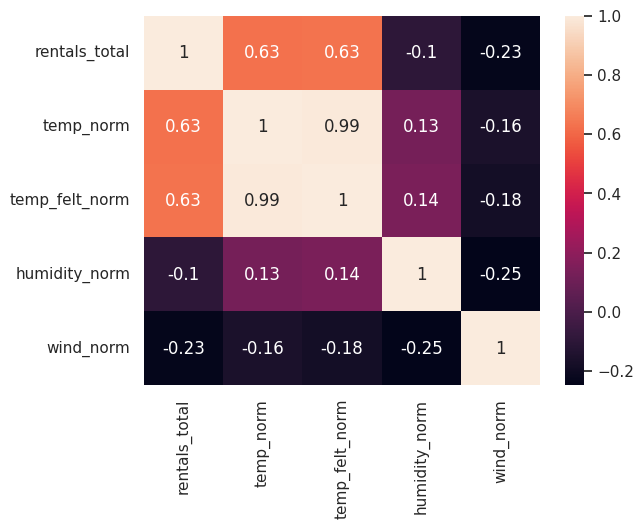

In [ ]:
# The code below generates a heatmap for the specified analysis.
# Creating corr_matrix to store correlation data from the dataset…
corr_matrix = df_sr_for_visuals.corr()

# Annot = True indicates that coefficients will be shown on the visual.
sns.heatmap(corr_matrix, annot = True)

### Question 6: True or False: There are more unregistered rentals on weekdays (M-F) and more registered rentals on weekends (Sat/Sun)
##### The answer is **false** because as previously observed in the scatterplot, there are more *unregistered* rentals on *weekends*, not weekdays. This is shown in the scatterplot through more data points from weekends being plotted further along the x-axis (unregistered rentals). Also, there are more *registered* rentals on *weekdays*, not weekends. This is shown in the visual through more data points from weekdays being plotted higher along the y-axis (registered rentals).

### Question 7: Using the swarmplot to determine the season with the lowest average daily rentals
##### Upon observation of the swarmplot, it appears that **winter** has the lowest average daily rentals, as most data points in the winter category are clustered at a lower y-value than data points from other seasons. In the analysis of the swarmplot visual above, it makes sense that winter has the lowest average daily scooter rentals because it is an unfavorable time to ride a scooter.

### Question 8: True or False: Based on the line plot, the average daily rentals increased between the first year and second year in the data
##### The answer is **true** because the there is a clear increase in total scooter rentals across all months, visualized by an marked increase from the blue line (first year) to the orange line (second year). The lines are a representation of the average daily scooter rentals for each month, and from the first year to the second year, the average daily scooter rentals increased.

### Question 9: Determining the most accurate statement from the responses, based on the pairplot
##### The correct answer is **“As "temp_norm" decreases, "rentals_total" tends to decrease”** because as previously concluded from the pairplot, there is a moderate positive relationship between normalized temperature and total scooter rentals (As temperature goes up, total rentals goes up). This also means as normalized temperature goes down, the total scooter rentals also goes down.
##### The other responses are not accurate: there is a highly strong positive relationship between normalized temperature and normalized felt temperature, and as felt temperature increases, the total scooter rentals also increases.

### Question 10: Determining the correlation coefficient that quantifies the strength of the relationship between total rentals and normalized temperature based on the heatmap data
##### The correlation coefficient (r) appears to be **0.63** (rounded to two decimal places).

### Preparing for modeling
##### For modeling and the specified analysis, the dependent variable is total scooter rentals and the independent variable is normalized temperature.
##### 25% of the data is pulled from the overall dataset for each variable and a test dataset is created. Therefore, 75% of the data is used in the training dataset.
##### Linear regression is used to build a model that can calculate total scooter rentals based on a given condition.

In [ ]:
# Separating the independent (x) variable and dependent (y) variable…
x = df_sr[['temp_norm']]
y = df_sr['rentals_total']

# Pulling out some of the data (25%) and creating a test dataset…
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Training the prediction model using the training datatset…
srmodel = LinearRegression()
srmodel.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
# Getting the coefficients and y-intercept for the model...
# The code below displays the y-intercept and coefficient of the regression model.
print(srmodel.intercept_)
print(srmodel.coef_)

1327.930810368468
[6463.96764523]


### Question 11: Determining the y-intercept of the regression equation generated previously
##### The y-intercept calculated is **1327.93** (rounded to two decimal places).

### Question 12: Determining the coefficient for the normalized temperature variable in the regression equation
##### The coefficient for the normalized temperature variable is **6463.97** (rounded to two decimal places).

### Question 13: Predicting total scooter rentals when normalized temperature = 0.30
##### The regression equation structure follows the 'y = mx + b' model.
##### Using the regression equation/model, the total predicted scooter rentals based on the condition is **3267.12** (rounded to two decimal places)

In [ ]:
# From the question, the condition provided is temp_norm = 0.30.
# Predicting total scooter rentals for the scenario…
condition = [[0.30]]

# The predict function will utilize the regression equation calculated previously to predict outcome based on a certain condition.
srmodel.predict(condition)

array([3267.12110394])

### Notebook Adjustment: Using the regression model to predict total scooter rentals in the test data
##### Predictions are stored in the variable called “y_pred”.

In [ ]:
# Making predictions in the test data using the predict function and storing in specific variable…
y_pred = srmodel.predict(x_test.values)

### Question 14: Determining the R squared (R^2) value for the model
##### The calculated R squared value is **0.38** (rounded to two decimal places).
##### Essentially, the R squared value of 0.38 means that approximately 38% of the variability in the dependent variable (total scooter rentals) can be explained by the independent variable in the model (normalized temperature).
##### To improve this model, other independent variables (factors) could be added to explain the variability more accurately.

In [ ]:
# Metrics can be used to evaluate the performance of the model using the measure r-squared
metrics.r2_score(y_test, y_pred)

0.37540464616240443